Hola **Andrea**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 

# 1. Data upload

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
gym = pd.read_csv("/datasets/gym_churn_us.csv")


# 2. Exploratory Data Analysis

In [2]:
gym.info()
print(gym.describe())
print("\nMissing values:\n", gym.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

There are no missing values. 

In [3]:

mean_values = gym.groupby("Churn").agg("mean")
print(mean_values)


         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0


When looking at the results grouped by "Churn", we can see that people who stay (Churn=0):
1. 87% of users who stay in the gym leave close to it vs 77% of users who don't stay leave clos. 
2. 53% of users who stay work in a partner company vs only 36% of users who don't stay work in partner companies.
3. The average age is 29 years for users who stay vs 26 for users who don't stay. 
4. Users who stay spend in average 158 USD extra vs 115 USD by users who don't stay. 
5. Users who stay have an average contract for 5.7 months vs 1.6 month contract for users who don't stay. 
6. Gender plays no role in the churn rate.
7. Average visit frequency (both historically and in the current month) is higher for users who stay.
8. Lifetime (months since the user arrived) is greater for users who stay that for users who leave. 4.7 months vs 0.9 months.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, analizaste muy bien de manera inicial los datos con lo que trabajarás
</div>

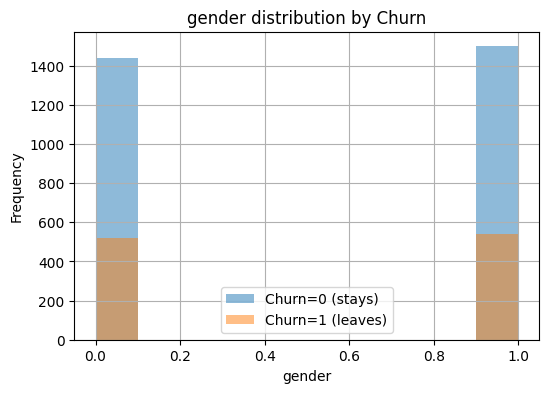

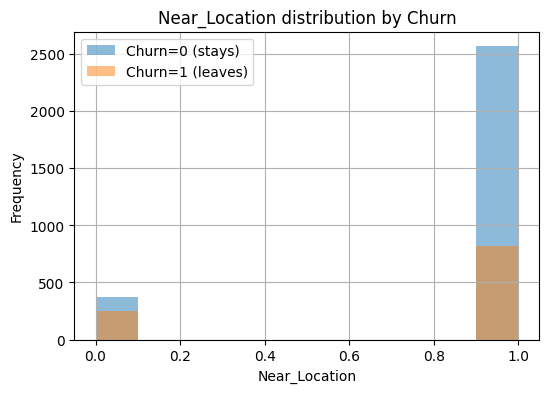

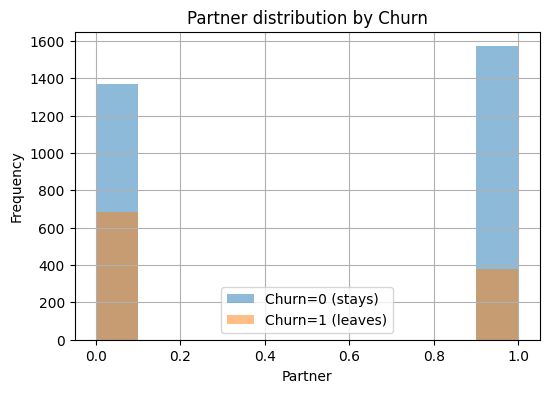

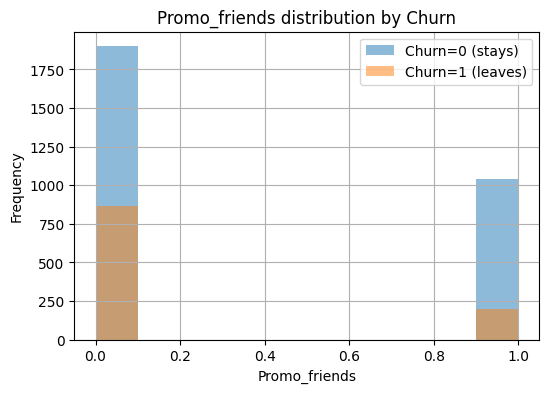

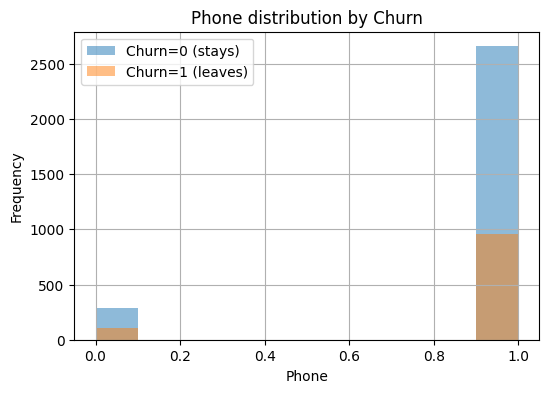

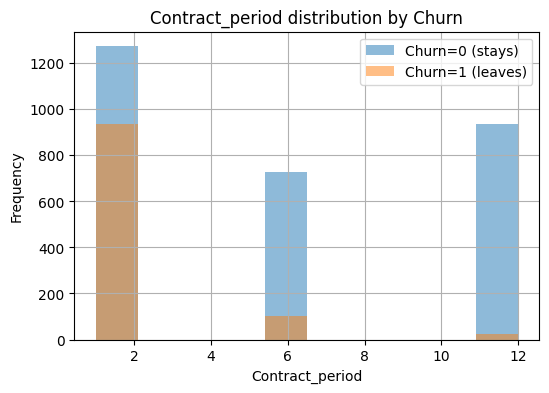

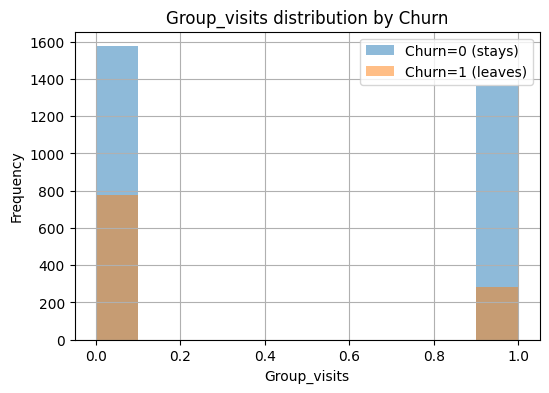

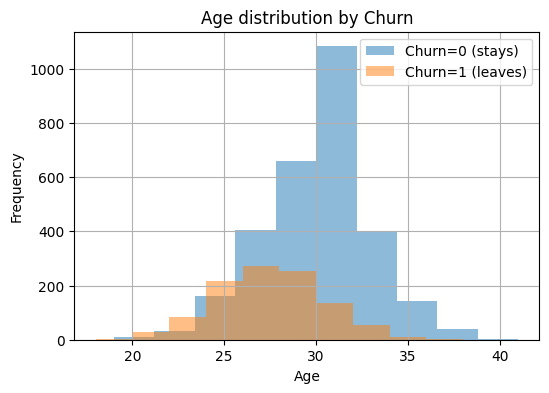

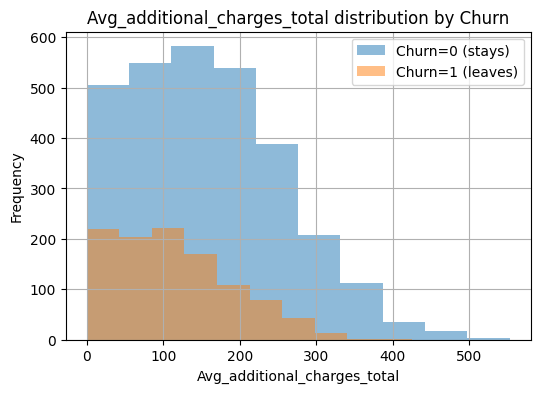

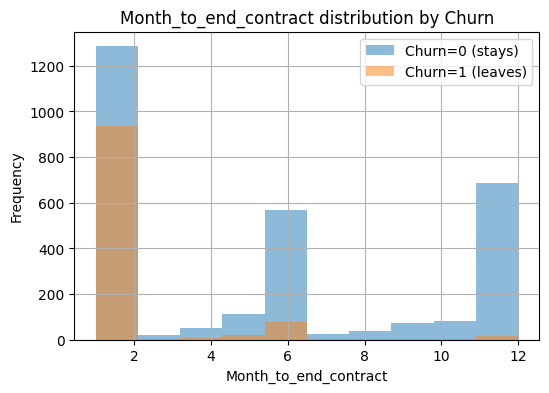

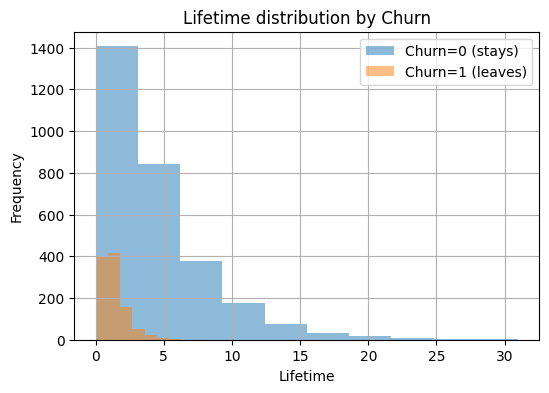

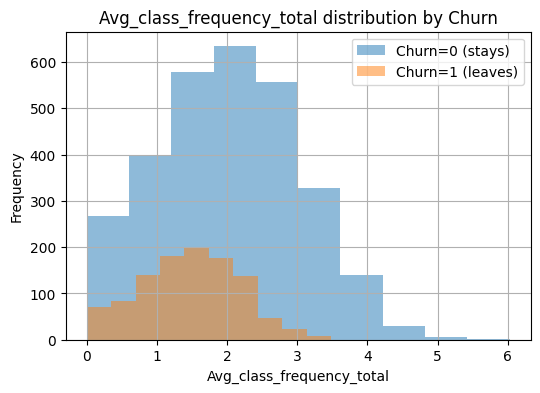

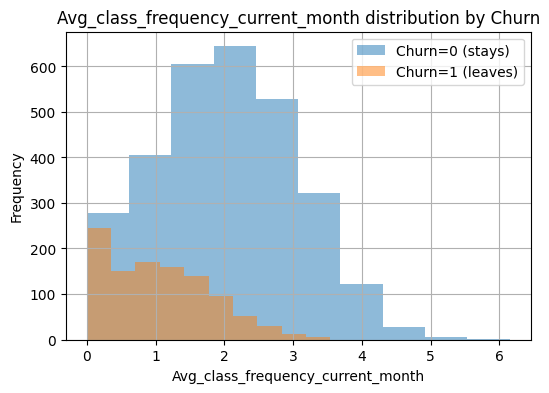

In [4]:

characteristics = gym.drop("Churn", axis=1).columns.tolist()

for col in characteristics:
    plt.figure(figsize=(6,4))
    gym[gym["Churn"]==0][col].hist(alpha=0.5, label="Churn=0 (stays)")
    gym[gym["Churn"]==1][col].hist(alpha=0.5, label="Churn=1 (leaves)")
    plt.title(f"{col} distribution by Churn")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

Correlation matrix



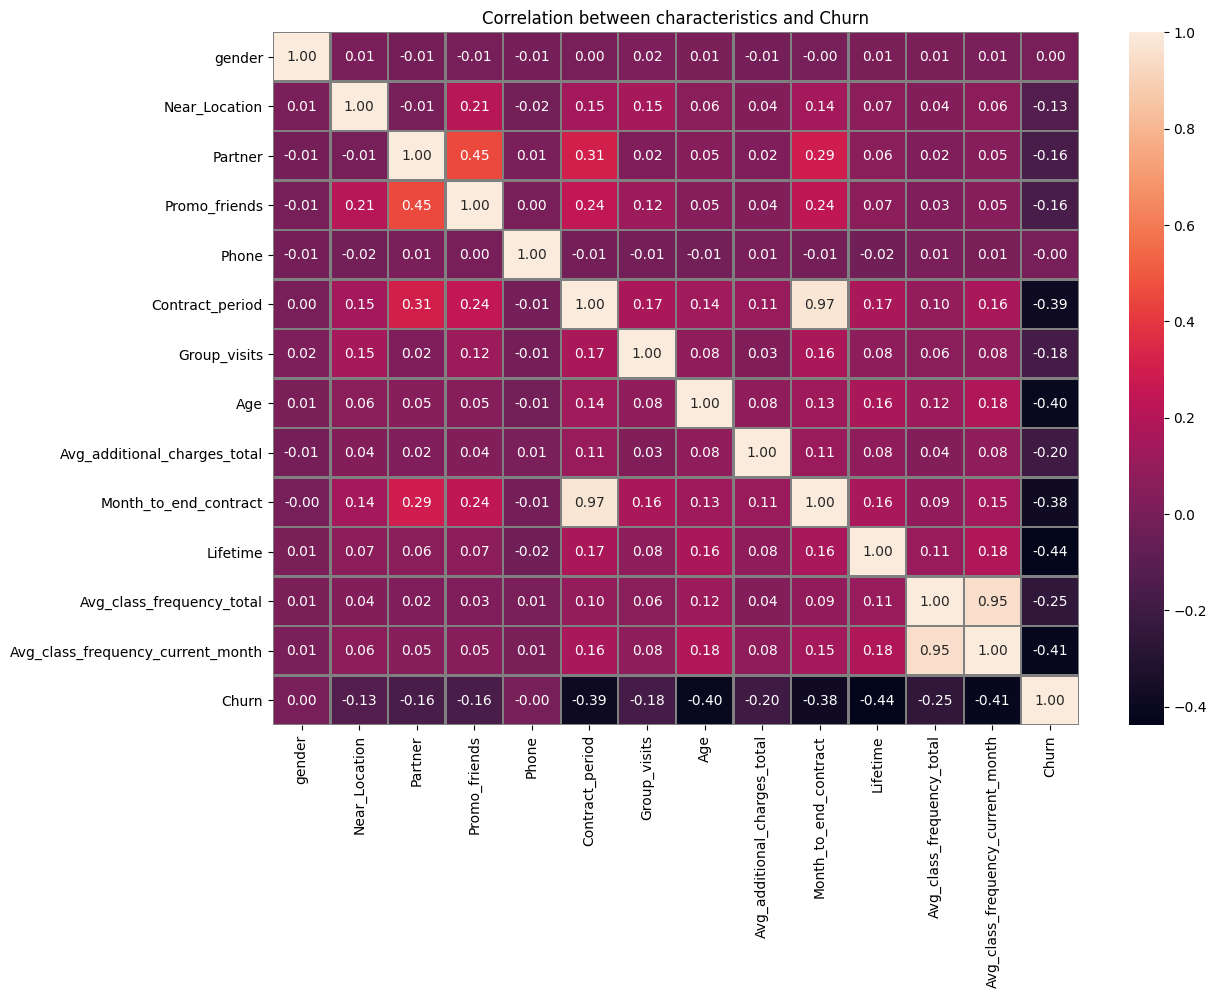

In [5]:

print("Correlation matrix\n")
corr = gym.corr()

plt.figure(figsize=(13,9))
plt.title("Correlation between characteristics and Churn")
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f",
    linewidths=1,
    linecolor="gray",
)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

# 3. Model that predicts user churn

In [6]:
# Split target vs characteristics
X = gym.drop("Churn", axis=1)
y = gym["Churn"]
# Split test/train samples
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Standarize data 
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# Function to train and test model
def test_model(model, X_train, y_train, X_test, y_test):
    if isinstance(model, LogisticRegression): # use st data if object "model" is an instance of class "LogisticRegression"
        X_train_use, X_test_use = X_train_st, X_test_st
    else:
        X_train_use, X_test_use = X_train, X_test
    model.fit(X_train_use, y_train)
    y_pred = model.predict(X_test_use)
    proba = model.predict_proba(X_test_use)[:,1] #probabilities for class=1 [0,1]
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)

    return precision, accuracy, recall

# Call function for Test Logistic model

logistic_model = LogisticRegression(random_state=0)
prec_lm, acc_lm, rec_lm = test_model(logistic_model, X_train, y_train, X_test, y_test)

# Call function for Random Forest model

randomforest_model = RandomForestClassifier(random_state=0)
prec_rf, acc_rf, rec_rf = test_model(randomforest_model, X_train, y_train, X_test, y_test)

# Show metrics

print("Logistic Model Results:\n")
print(f"Accuracy:{acc_lm:.2f}, Precision:{prec_lm:.2f}, Recall:{rec_lm:.3f}")
print("\nRandom Forest Model Results:\n")
print(f"Accuracy:{acc_rf:.2f}, Precision:{prec_rf:.2f}, Recall:{rec_rf:.3f}")
    


Logistic Model Results:

Accuracy:0.92, Precision:0.85, Recall:0.828

Random Forest Model Results:

Accuracy:0.92, Precision:0.84, Recall:0.818


The Logistic Regression model shows slightly better results.

Accuracy: 93% the model predicts correctly 93 out of 100 cases overall.
Precision: 87% when the model predicts that a user will leave, it is correct 87 out of 100 times.
Recall: 82% of all the users who actually left, the model was able to correctly identify 82%.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
</div>

# 4. User clusters

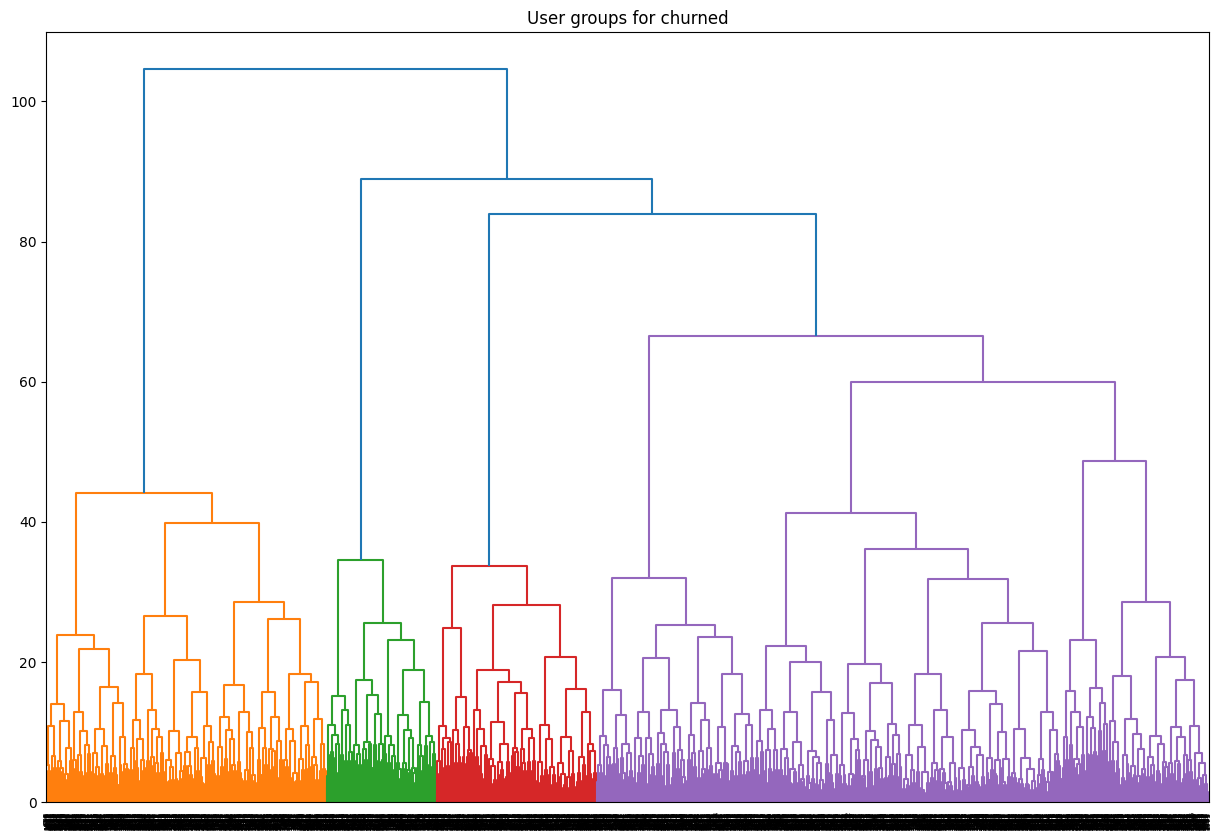

In [7]:

# Distance (standarized) matrix
sc = StandardScaler() 
X_sc = sc.fit_transform(X)

# Dendrogram
linked = linkage(X_sc, method="ward")
plt.figure(figsize=(15,10))
dendrogram(linked, orientation="top")
plt.title("User groups for churned")
plt.show()


In [13]:

# KMeans Model



km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)
gym["Cluster"] = labels

# Cluster means
cluster_means = gym.groupby("Cluster").mean()
print(cluster_means)



           gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster                                                               
0        0.502970       0.959406  0.783168       0.574257  1.000000   
1        0.522078       0.862338  0.470130       0.306494  0.000000   
2        0.495050       0.000000  0.463366       0.079208  1.000000   
3        0.485737       1.000000  0.350238       0.240095  1.000000   
4        0.559666       0.976134  0.356802       0.230310  0.998807   

         Contract_period  Group_visits        Age  \
Cluster                                             
0              10.889109      0.542574  29.982178   
1               4.787013      0.425974  29.301299   
2               2.352475      0.215842  28.477228   
3               1.948494      0.341521  28.167987   
4               2.669451      0.473747  30.125298   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                 

Clusters 2 and 3 have the highest risk of users leaving (44.3% and 51.4%). There high risk clusters have in common the following:
1. Average additinal charges are the lowest ($135 and $131), meaning they do not engage much. 
2. Monthly visit frequency to the gym is slightly lower than low risk clusters (1.47 and 1.01 visits per month)
3. Average contract period for high risk clusters is 2.3 and 1.9 months.
4. Participation in group sessions is also low (21% and 34%)compared to low risk clusters.
5. Partnership with companies is low (46 and 35%)
6. Only 7% and 24% of users registered to the gym by a friend promo
7. Location does not seem to be a risk factor since none of cluster 2 users live nearby and in cluster 3 all of users live nearby.

Clusters 0 and 4 have the lowest churn risk: 2.7% and 6.8%. These have in common the following:
1. Average affitional charges are higher ($160 and $161) than high risk clusters.
2. Monthly visit frequency is slightly higher (1.97 and 2.85 times)
3. Average contract period isalso higer (10.8 and 2.6 months)
4. Participation in group sessions is higher (54% and 47%)
5. Partnership with companies is high (78% and 35%)
6. 57% and 23% of users joined by a friend promo.
7. Location seems to be important since 95% and 97% of users leave nearby 

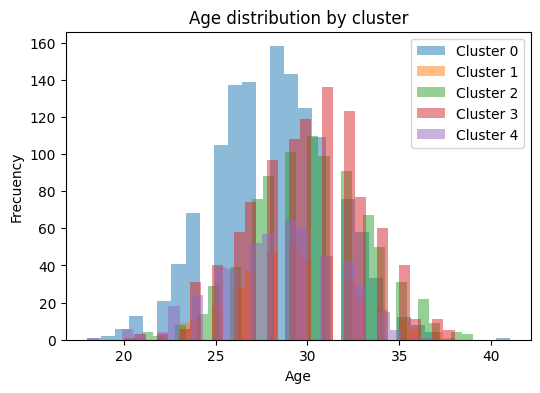

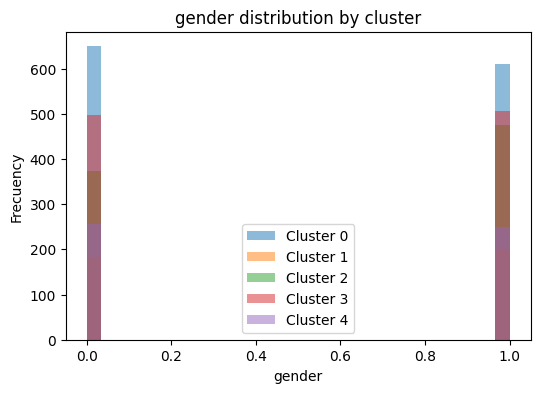

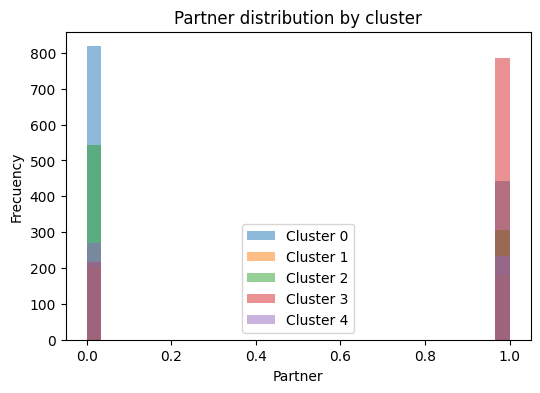

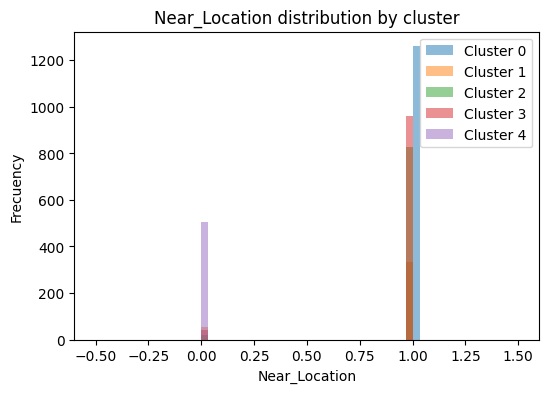

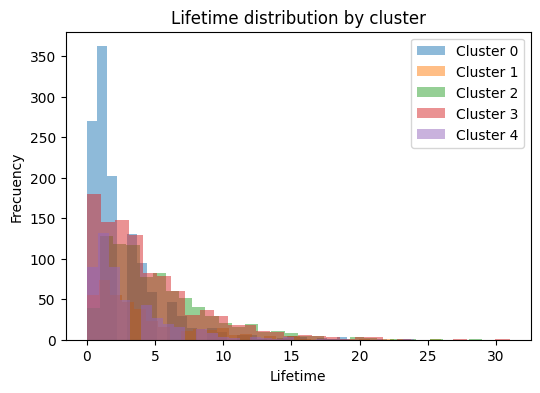

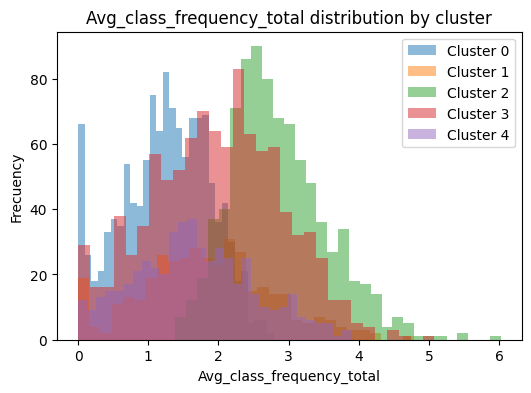

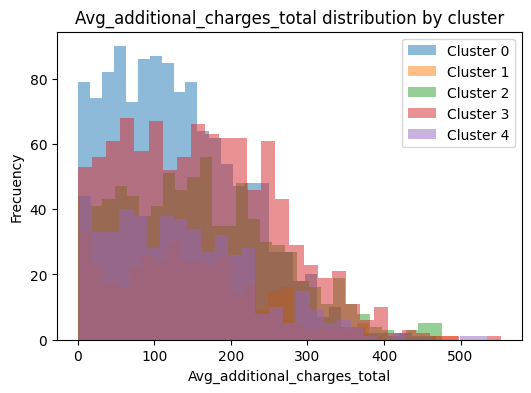

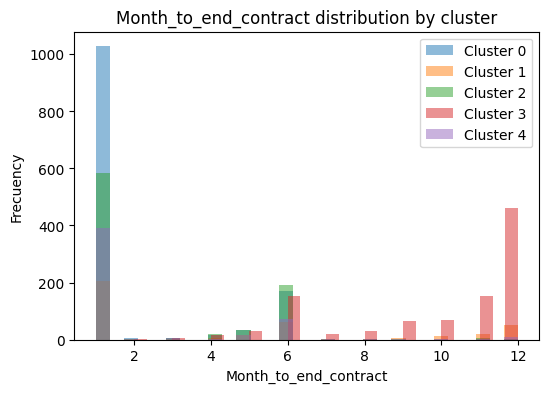

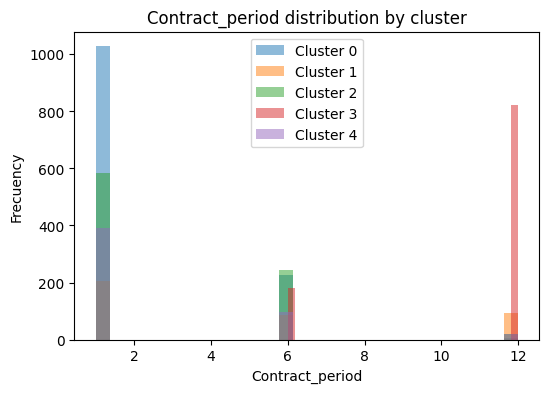

In [9]:
# Distribution for characteristics

features = [
    "Age",
    "gender",
    "Partner",
    "Near_Location",
    "Lifetime",
    "Avg_class_frequency_total",
    "Avg_additional_charges_total",
    "Month_to_end_contract",
    "Contract_period"
]

# Histogram by cluster
for feature in features:
    plt.figure(figsize=(6,4))
    for c in sorted(gym["Cluster"].unique()): #for every unique cluster...
        plt.hist(
            gym[gym["Cluster"] == c][feature], # sorts rows for cluster C & feature & plot 
            bins=30, alpha=0.5, label=f"Cluster {c}"
        )
    plt.title(f"{feature} distribution by cluster")
    plt.xlabel(feature)
    plt.ylabel("Frecuency")
    plt.legend()
    plt.show()

In [14]:
# Churn rate 


churn_rate = gym.groupby("Cluster")["Churn"].mean()
print("Churn rate by cluster:\n", churn_rate.sort_values(ascending=False))



Churn rate by cluster:
 Cluster
3    0.514263
2    0.443564
1    0.267532
4    0.068019
0    0.027723
Name: Churn, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
</div>

Clusters with highest churn risk are 3 and two with 51% and 44% churn rate. Clusters 1,4 and 0 have a low churn risk with 26%, 6.8% and 2.7% churn risk.  

# 5. Conclusions and recomendations

Based on the KMeans clustering means, we can draw following insights:

1. Partnership with companies can help retain customers.
2. Contract lenght also retains customers. Leaving out short term contract lengths like 1 or 3 months can help retain customers.
3. Expanding “bring a friend” campaigns could also increase customer retention rate. 

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Las conclusiones en cada sección quedaron impecables dejando un proceso de análisis súper claro de inicio a fin, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>